<a href="https://colab.research.google.com/github/wayaadhyasta/AnalisisTumorOtak_DeepLearning/blob/main/TumorOtak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [11]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

1. Import Data

In [12]:
def load_images(directory):
  images = []
  for filename in os.listdir(directory):

      img = Image.open(os.path.join(directory, filename))
      img = Image.resize((224, 224)) # ukuran dimensi dari gambar yg di import
      img = Image.convert('RGB')
      img = np.array(img)
      images.append(img)
  return images

In [14]:
def load_images(directory):
  images = []
  for filename in os.listdir(directory):

      img = Image.open(os.path.join(directory, filename))
      # Call resize on the image object (img), not the module (Image)
      img = img.resize((224, 224)) # ukuran dimensi dari gambar yg di import
      img = img.convert('RGB')
      img = np.array(img)
      images.append(img)
  return images

In [17]:
tumor_images = load_images('/content/drive/MyDrive/yes-20250311T150816Z-001/yes')
no_tumor_images = load_images('/content/drive/MyDrive/no')

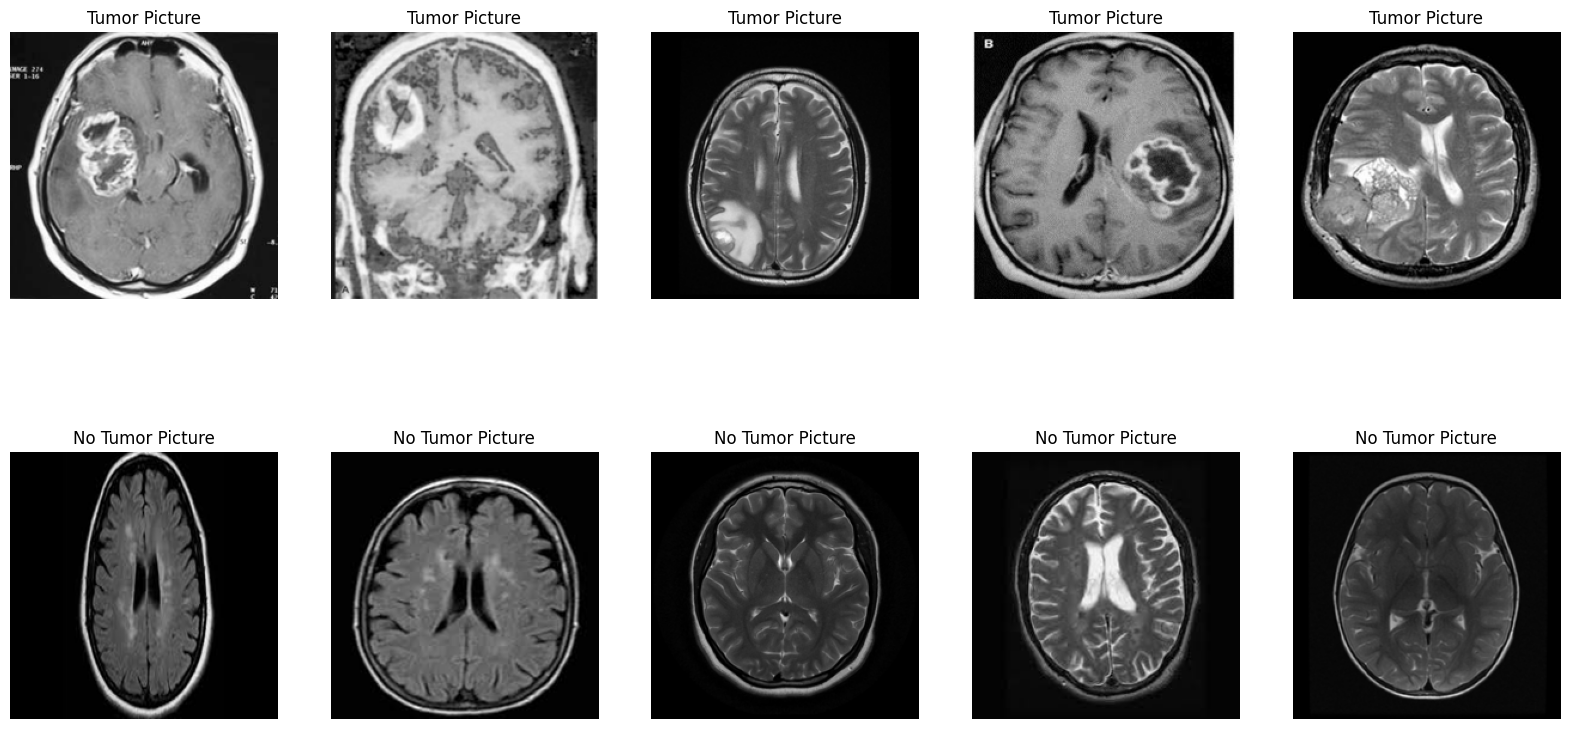

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i in range(5):
  axes[0, i].imshow(tumor_images[i])
  axes[0, i].set_title('Tumor Picture')
  axes[0, i].axis('off')

for i in range(5):
  axes[1, i].imshow(no_tumor_images[i])
  axes[1, i].set_title('No Tumor Picture')
  axes[1, i].axis('off')

plt.show()

In [19]:
type(tumor_images)

list

In [20]:
len(tumor_images)

155

In [21]:
len(no_tumor_images)

98

2. Labeling

In [22]:
def assign_label(tumor_image, no_tumor_images):
  tumor_label = np.ones(len(tumor_images))
  no_tumor_labels = np.zeros(len(no_tumor_images))
  return tumor_label, no_tumor_labels
tumor_labels, no_tumor_labels = assign_label(tumor_images, no_tumor_images)

In [23]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [24]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
type(tumor_labels)

numpy.ndarray

In [26]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)


In [27]:
data

[array([[[ 12,  12,  12],
         [ 17,  17,  17],
         [ 22,  22,  22],
         ...,
         [ 83,  83,  83],
         [ 83,  83,  83],
         [ 79,  79,  79]],
 
        [[ 12,  12,  12],
         [ 17,  17,  17],
         [ 21,  21,  21],
         ...,
         [ 55,  55,  55],
         [ 55,  55,  55],
         [ 56,  56,  56]],
 
        [[ 12,  12,  12],
         [ 15,  15,  15],
         [ 19,  19,  19],
         ...,
         [ 14,  14,  14],
         [ 14,  14,  14],
         [ 13,  13,  13]],
 
        ...,
 
        [[ 17,  17,  17],
         [ 17,  17,  17],
         [ 19,  19,  19],
         ...,
         [ 43,  43,  43],
         [142, 142, 142],
         [127, 127, 127]],
 
        [[ 16,  16,  16],
         [ 16,  16,  16],
         [ 15,  15,  15],
         ...,
         [ 42,  42,  42],
         [138, 138, 138],
         [ 79,  79,  79]],
 
        [[ 56,  56,  56],
         [ 55,  55,  55],
         [ 53,  53,  53],
         ...,
         [145, 145, 145],
  

In [28]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
data[0].shape

(224, 224, 3)

3. Spiting Data

In [30]:
x = np.array(data)
y = np.array(labels)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

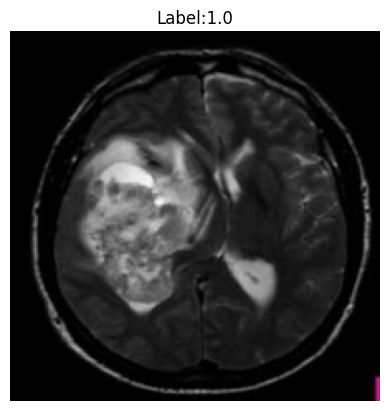

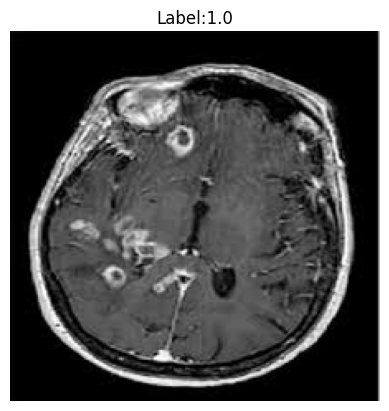

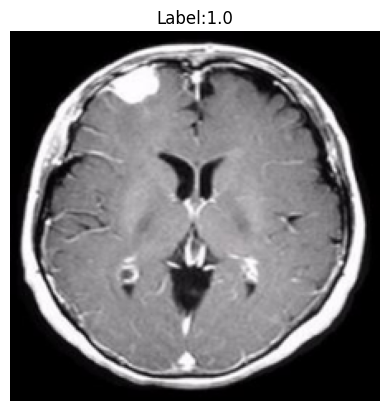

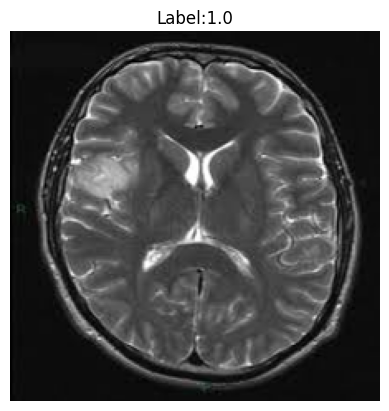

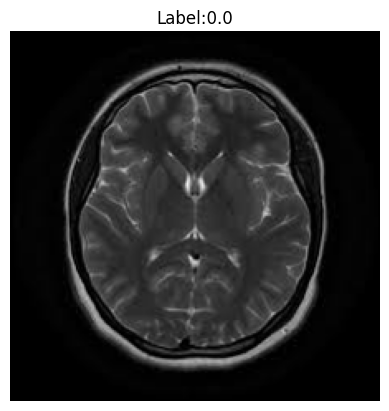

In [35]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title('Label:{}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [36]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [37]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

4. Traning data

In [38]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (224, 224, 3), padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      50,466,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,467,969 (192.52 MB)

 Trainable params: 50,467,969 (192.52 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(train, validation_data=val, epochs=10, verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4737 - loss: 5592.6230 - val_accuracy: 0.2500 - val_loss: 5515.3774
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5265 - loss: 3074.3013 - val_accuracy: 0.7500 - val_loss: 1248.4966
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6859 - loss: 1592.4550 - val_accuracy: 0.5500 - val_loss: 1080.3123
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7029 - loss: 1011.7891 - val_accuracy: 0.8000 - val_loss: 175.8172
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7016 - loss: 551.8356 - val_accuracy: 0.9000 - val_loss: 95.9805
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8413 - loss: 147.1650 - val_accuracy: 0.8500 - val_loss: 47.4647
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8247 - loss: 105.2011 - val_accuracy: 0.9000 - val_loss: 12.2039
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8826 - loss: 29.6087 - val_accuracy: 1

In [43]:
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.7232 - loss: 42.2824


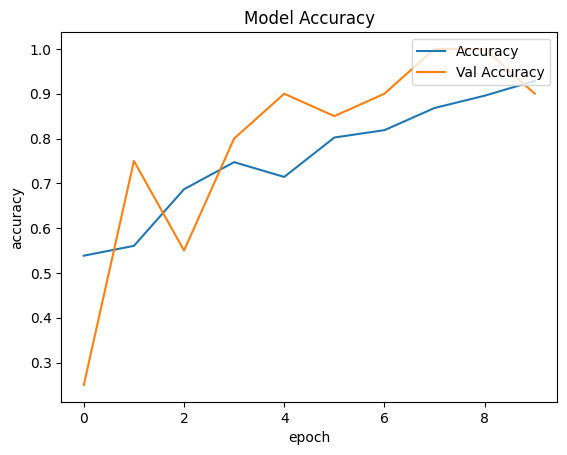

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

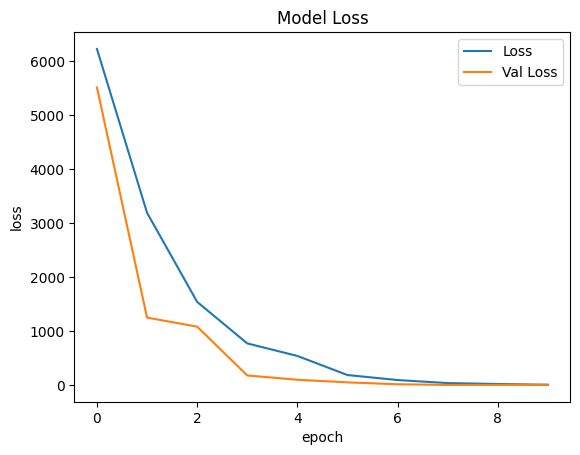

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc = 'upper right')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [46]:
model.save('/content/drive/MyDrive/tumor_otak.h5')

In [51]:
def load_upload_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    # The line below was causing the error
    # img_array = img.array / 255.0
    # Changed it to the below to divide the img_array by 255
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_upload_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return 'Tumor Detected'
    else:
        return 'No tumor detected'

Saving Y7.jpg to Y7 (1).jpg


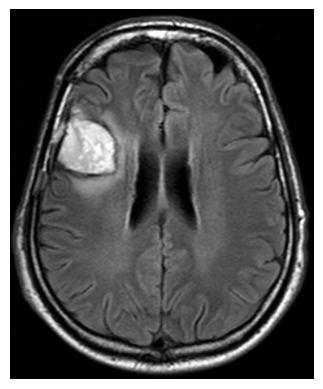

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
No tumor detected


In [52]:
upload = files.upload()
file_name = list(upload.keys())[0]
image_bytes = upload[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)